In [5]:
! pip install tensorflow-gpu

In [6]:
! pip install keras

In [7]:
! pip install pandas

In [8]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TF version: 2.3.1
Hub version: 0.9.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [9]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPooling2D
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob


In [10]:
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, r2_score
import os
import cv2

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
file="/content/drive/My Drive/insurance.csv"


In [13]:
import pandas as pd
df=pd.read_csv(file)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [14]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [15]:
df.shape

(1338, 7)

In [16]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [18]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

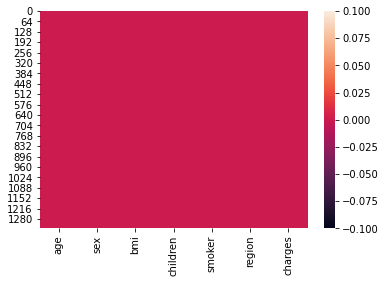

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.heatmap(df.isnull())

In [20]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['sex']=encoder.fit_transform(df['sex'])
df['smoker']=encoder.fit_transform(df['smoker'])
df['region']=encoder.fit_transform(df['region'])

In [22]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


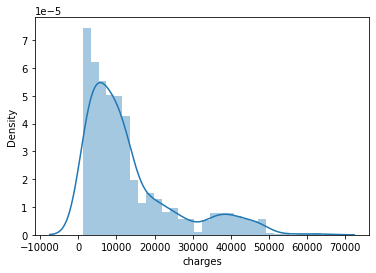

In [23]:
sns.distplot(df['charges'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


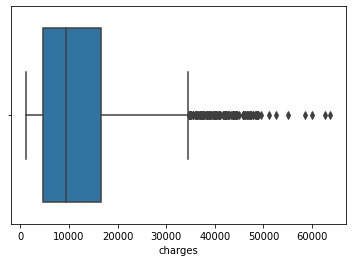

In [24]:
sns.boxplot(df['charges'])

In [69]:
df[df['charges']>=35000]

,age,sex,bmi,children,smoker,region,charges
14,27,1,42.130,0,1,2,39611.75770
19,30,1,35.300,0,1,3,36837.46700
23,34,0,31.920,1,1,0,37701.87680
29,31,1,36.300,2,1,3,38711.00000
30,22,1,35.600,0,1,3,35585.57600
...,...,...,...,...,...,...,...
1300,45,1,30.360,0,1,2,62592.87309
1301,62,1,30.875,3,1,1,46718.16325
1303,43,1,27.800,0,1,3,37829.72420
1313,19,0,34.700,2,1,3,36397.57600


In [25]:
X = df.drop('charges',axis=1)
y = df['charges']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [26]:
X_train

,age,sex,bmi,children,smoker,region
428,21,0,16.815,1,0,0
226,28,1,38.060,0,0,2
867,57,1,43.700,1,0,3
397,21,1,31.020,0,0,2
300,36,1,27.550,3,0,0
...,...,...,...,...,...,...
1180,42,0,41.325,1,0,0
1147,20,0,31.920,0,0,1
527,51,0,25.800,1,0,3
1149,42,1,34.100,0,0,3


In [27]:
X_test.shape

(402, 6)

In [28]:
len(X_train.columns)

6

In [29]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

In [30]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [35]:
def create_model(dense_layers,activation,optimizer):
    model = Sequential()
    for index, lsize in enumerate(dense_layers):
        # Input Layer - includes the input_shape
        if index == 0:
          model.add(Dense(lsize,activation=activation,input_dim =6))
        else:
          model.add(Dense(lsize,activation=activation))   
    model.add(Dense(1))
    model.compile(optimizer = optimizer,loss = "mean_squared_error",metrics=['mse'])
    return model

model = KerasRegressor(build_fn=create_model,verbose=1)

param_grid = {'dense_layers': [(128,64),(128,64,32),(128,64,32,16,8)],
              'activation':['relu'],
              'optimizer':['adam'],
              'epochs':[50,100],
              'batch_size':[32]}

grid = GridSearchCV(model,param_grid=param_grid, cv=5)

grid_results = grid.fit(X_train,y_train)

print('Parameters of the best model: ')
print(grid_results.best_params_)

Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 331985696.0000 - mse: 331985696.0000
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 331882016.0000 - mse: 331882016.0000
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 331654272.0000 - mse: 331654272.0000
Epoch 4/50
24/24 [==============================] - 0s 2ms/step - loss: 331188960.0000 - mse: 331188960.0000
Epoch 5/50
24/24 [==============================] - 0s 2ms/step - loss: 330376320.0000 - mse: 330376320.0000
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 329030912.0000 - mse: 329030912.0000
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 326971584.0000 - mse: 326971584.0000
Epoch 8/50
24/24 [==============================] - 0s 2ms/step - loss: 323978816.0000 - mse: 323978816.0000
Epoch 9/50
24/24 [==============================] - 0s 2ms/step - loss: 319942016.0000 - mse: 319942016.0000
Epoch 10/50
24/24 [

In [36]:
params=grid_results.best_params_
params

{'activation': 'relu',
 'batch_size': 32,
 'dense_layers': (128, 64, 32, 16, 8),
 'epochs': 100,
 'optimizer': 'adam'}

In [74]:
model = Sequential([
    Dense(128, input_dim=6, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1,activation='linear')
])

model.compile(optimizer='adam', loss = "mean_squared_error",metrics=['mse'])

r=model.fit(X_train, y_train, epochs=200, batch_size=32,validation_data=(X_test,y_test))

Epoch 1/200
30/30 [==============================] - 0s 6ms/step - loss: 334447072.0000 - mse: 334447072.0000 - val_loss: 295106912.0000 - val_mse: 295106912.0000
Epoch 2/200
30/30 [==============================] - 0s 3ms/step - loss: 334305568.0000 - mse: 334305568.0000 - val_loss: 294746048.0000 - val_mse: 294746048.0000
Epoch 3/200
30/30 [==============================] - 0s 3ms/step - loss: 333053664.0000 - mse: 333053664.0000 - val_loss: 291928864.0000 - val_mse: 291928864.0000
Epoch 4/200
30/30 [==============================] - 0s 3ms/step - loss: 325281344.0000 - mse: 325281344.0000 - val_loss: 277128640.0000 - val_mse: 277128640.0000
Epoch 5/200
30/30 [==============================] - 0s 3ms/step - loss: 291744640.0000 - mse: 291744640.0000 - val_loss: 224237616.0000 - val_mse: 224237616.0000
Epoch 6/200
30/30 [==============================] - 0s 3ms/step - loss: 200804016.0000 - mse: 200804016.0000 - val_loss: 110813816.0000 - val_mse: 110813816.0000
Epoch 7/200
30/30 [===

In [75]:
y_pred= model.predict(X_test)
y_pred

array([[ 8107.483 ],
       [ 5682.0938],
       [13553.812 ],
       [15471.564 ],
       [ 4299.195 ],
       [ 9618.289 ],
       [10829.567 ],
       [19562.861 ],
       [ 8879.88  ],
       [19709.479 ],
       [ 3833.8652],
       [ 4589.0527],
       [ 8518.769 ],
       [13130.743 ],
       [12005.698 ],
       [14410.731 ],
       [ 3568.9006],
       [18117.473 ],
       [12692.351 ],
       [23870.717 ],
       [38605.008 ],
       [ 2688.7837],
       [ 3683.6965],
       [ 7058.5   ],
       [ 5373.278 ],
       [12817.669 ],
       [ 9333.972 ],
       [13228.53  ],
       [ 4029.5154],
       [25593.066 ],
       [ 3041.6582],
       [40344.965 ],
       [ 6690.474 ],
       [ 9725.133 ],
       [ 4878.621 ],
       [ 5859.7617],
       [14871.019 ],
       [10772.437 ],
       [10300.46  ],
       [ 8195.868 ],
       [15084.297 ],
       [10748.073 ],
       [ 5661.2173],
       [ 9276.233 ],
       [ 3789.774 ],
       [ 7946.6074],
       [10252.926 ],
       [35551

In [76]:

from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.8461718930960505


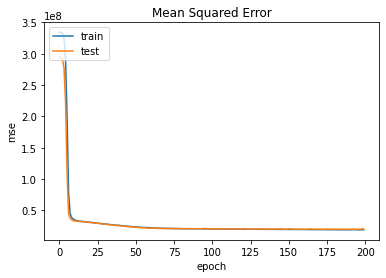

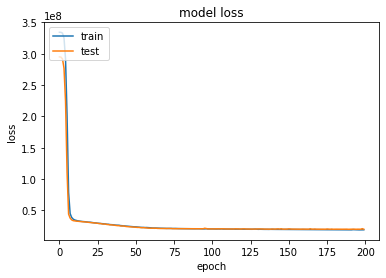

In [77]:
# Plotting Loss And Root Mean Square Error For both Training And Test Sets
plt.plot(r.history['mse'])
plt.plot(r.history['val_mse'])
plt.title('Mean Squared Error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [78]:
y_test
y_test1=pd.DataFrame(y_test)

y_test1.columns=['y_test']
y_test1=y_test1.reset_index()
y_test1

,index,y_test
0,7,7281.50560
1,999,5267.81815
2,1209,12347.17200
3,491,24513.09126
4,625,3736.46470
...,...,...
397,854,24106.91255
398,554,17878.90068
399,1278,22462.04375
400,374,1391.52870


In [79]:
y_pred
y_pred_hyper=pd.DataFrame(y_pred)
y_pred_hyper.columns=['y_pred_hyper']
y_pred_hyper['index1']=y_test1['index']
y_pred_hyper

,y_pred_hyper,index1
0,8107.482910,7
1,5682.093750,999
2,13553.811523,1209
3,15471.564453,491
4,4299.194824,625
...,...,...
397,23701.091797,854
398,4598.681641,554
399,31170.886719,1278
400,4343.668457,374


In [80]:
result1=pd.concat([y_test1,y_pred_hyper],axis=1)
result1.drop('index1',axis=1)

,index,y_test,y_pred_hyper
0,7,7281.50560,8107.482910
1,999,5267.81815,5682.093750
2,1209,12347.17200,13553.811523
3,491,24513.09126,15471.564453
4,625,3736.46470,4299.194824
...,...,...,...
397,854,24106.91255,23701.091797
398,554,17878.90068,4598.681641
399,1278,22462.04375,31170.886719
400,374,1391.52870,4343.668457


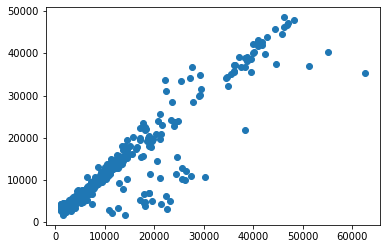

In [81]:
plt.scatter(result1['y_test'],result1['y_pred_hyper'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


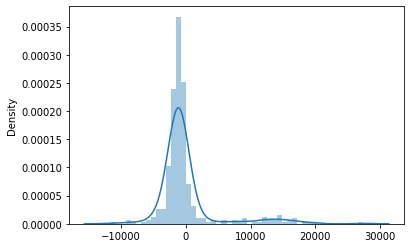

In [82]:
sns.distplot(result1['y_test']-result1['y_pred_hyper'])

In [83]:
df.iloc[500]

age            29.000
sex             1.000
bmi            34.400
children        0.000
smoker          1.000
region          3.000
charges     36197.699
Name: 500, dtype: float64

In [84]:
a=[[29,1,34,0,1,3]]
a=s.transform(a)
b=model.predict(a)
b

array([[36120.316]], dtype=float32)